<a href="https://colab.research.google.com/github/RavinduP/Bankprediction-DT-NN/blob/main/bankdataDT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA Parts
exploring the dataset and the patterns which are there at the dataset


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path_additional_full = "/content/drive/MyDrive/ML data set/bank-full.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df = pd.read_csv(file_path_additional_full, sep=";", engine='python')

In [ ]:
# Shape and column names
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())


Dataset Shape: (45211, 17)

Column Names: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:

df.shape


(45211, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Get summary statistics for numeric columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Show unique values of each object (categorical) column
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\n{col} --> {df[col].unique()}")



job --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital --> ['married' 'single' 'divorced']

education --> ['tertiary' 'secondary' 'unknown' 'primary']

default --> ['no' 'yes']

housing --> ['yes' 'no']

loan --> ['no' 'yes']

contact --> ['unknown' 'cellular' 'telephone']

month --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome --> ['unknown' 'failure' 'other' 'success']

y --> ['no' 'yes']


In [ ]:
# Check for 'unknown' values in each column
unknown_counts = (df == 'unknown').sum()
print("Columns with 'unknown' values:\n", unknown_counts[unknown_counts > 0])


Columns with 'unknown' values:
 job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


In [ ]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


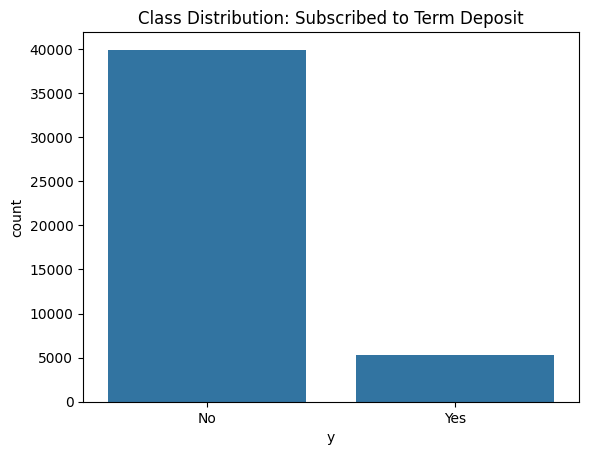

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='y', data=df)
plt.title("Class Distribution: Subscribed to Term Deposit")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Percentage of each class
print(df['y'].value_counts(normalize=True) * 100)

In [ ]:
df['y'].groupby(df['y']).count()

,y
y,
no,39922
yes,5289


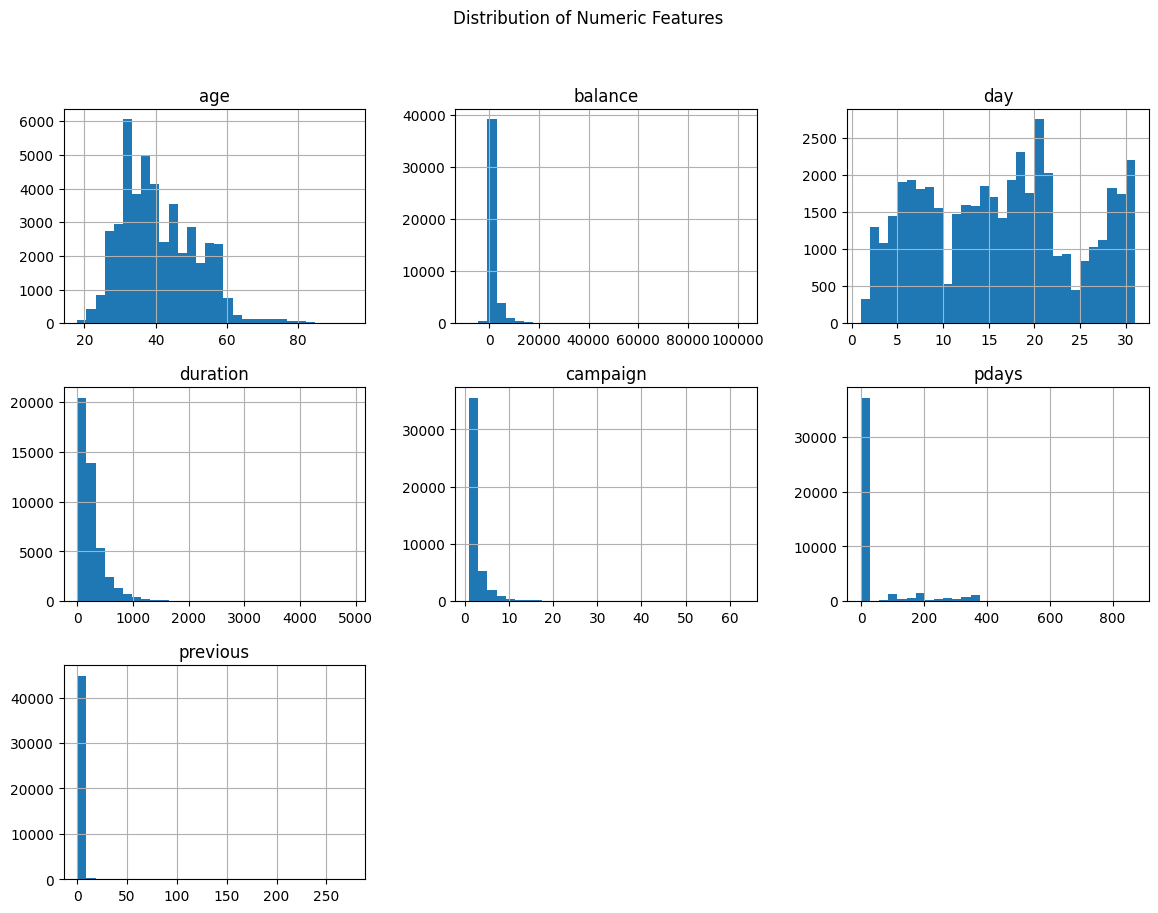

In [ ]:
df.describe()  # Quick stats for numeric features

# Histogram of numeric features
df.hist(figsize=(14, 10), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

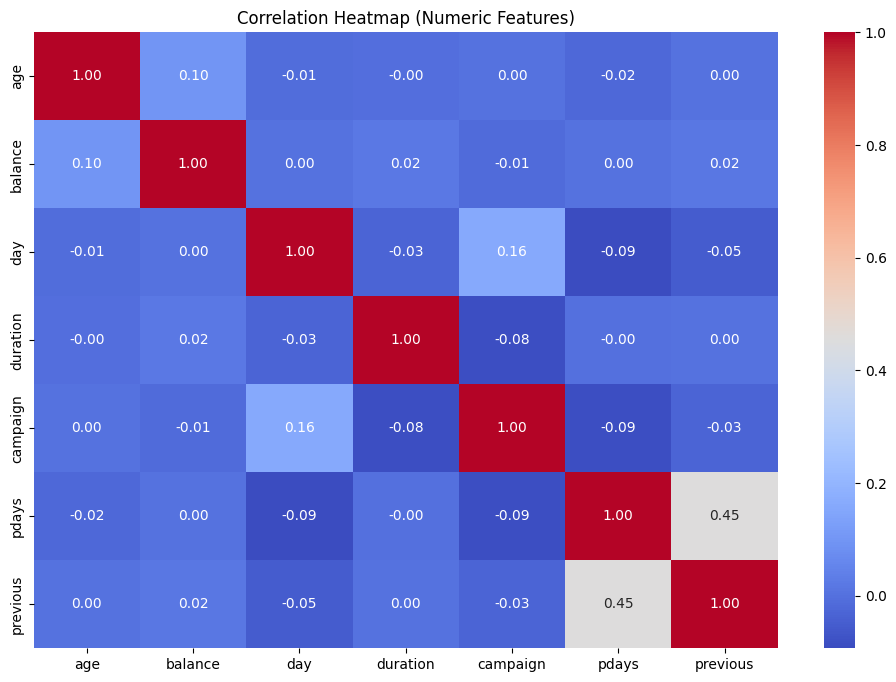

In [ ]:
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

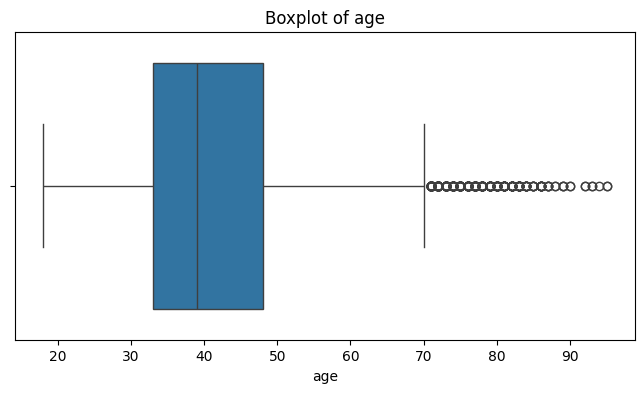

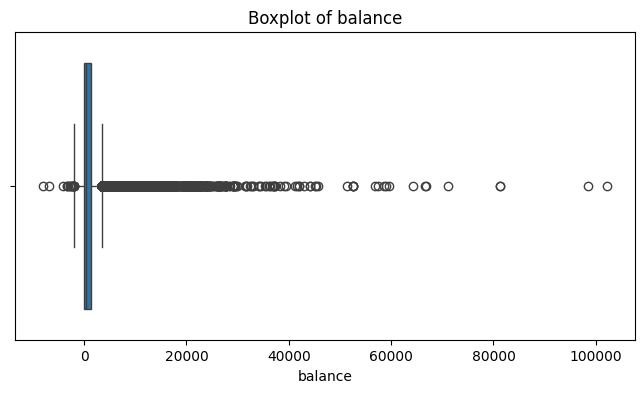

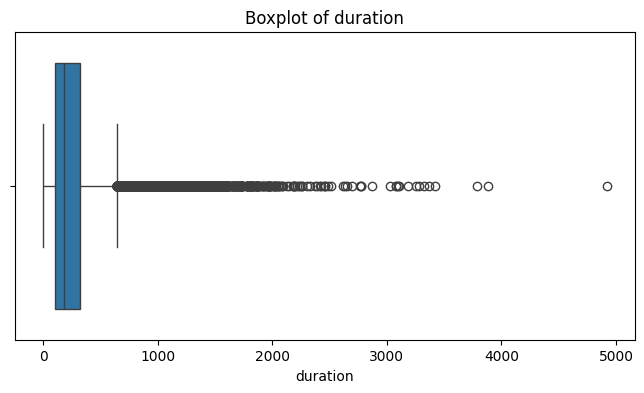

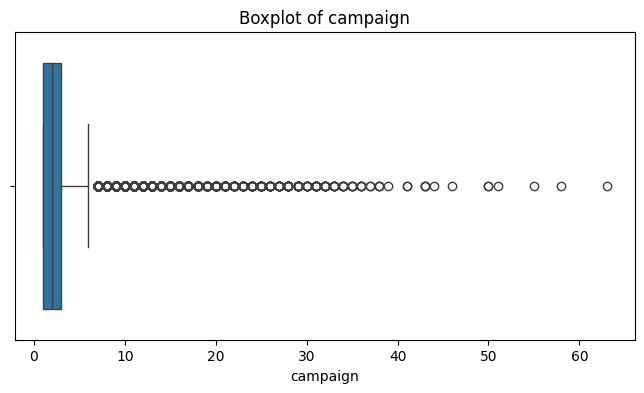

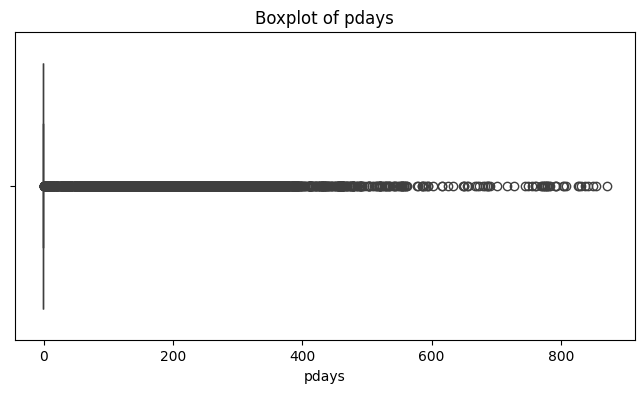

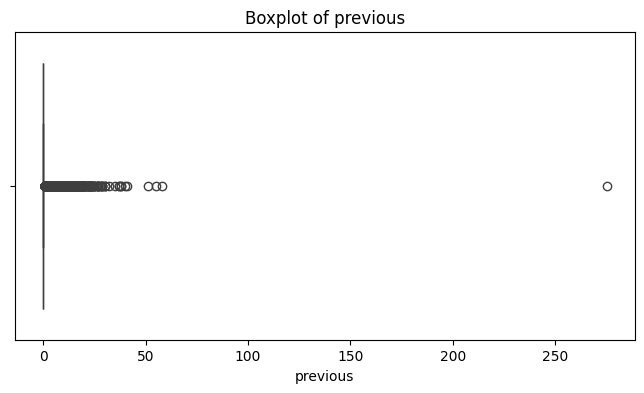

In [ ]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [ ]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('There are ', len(numerical_features), 'numerical variables')

# visualising
df[numerical_features].head()

There are  7 numerical variables


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


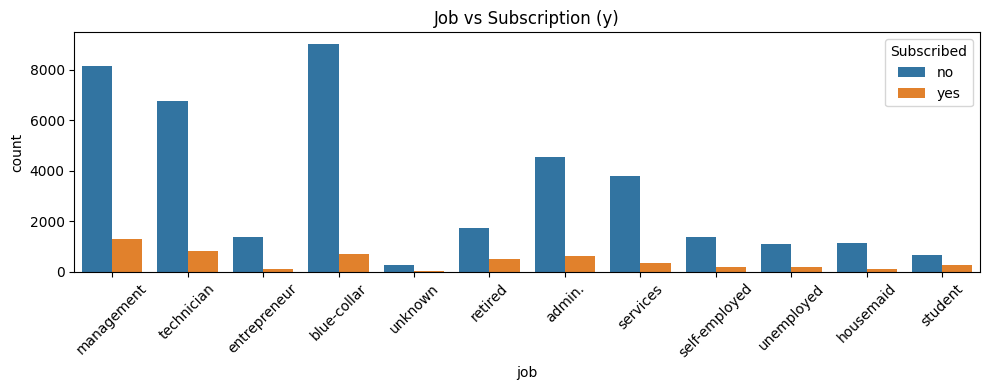

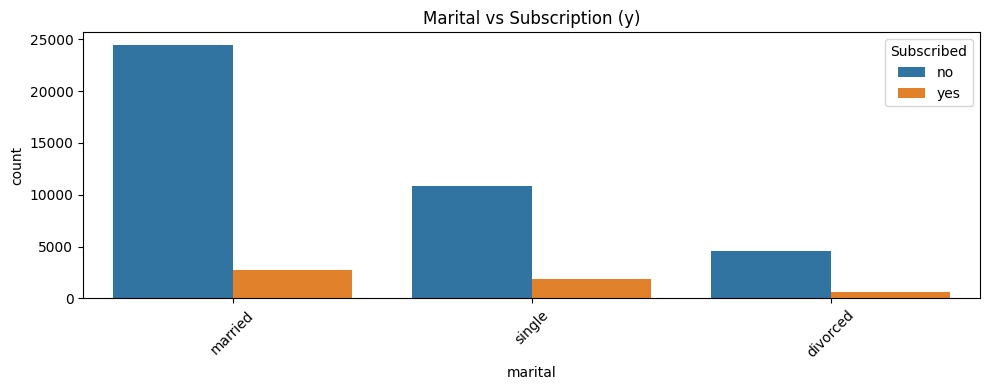

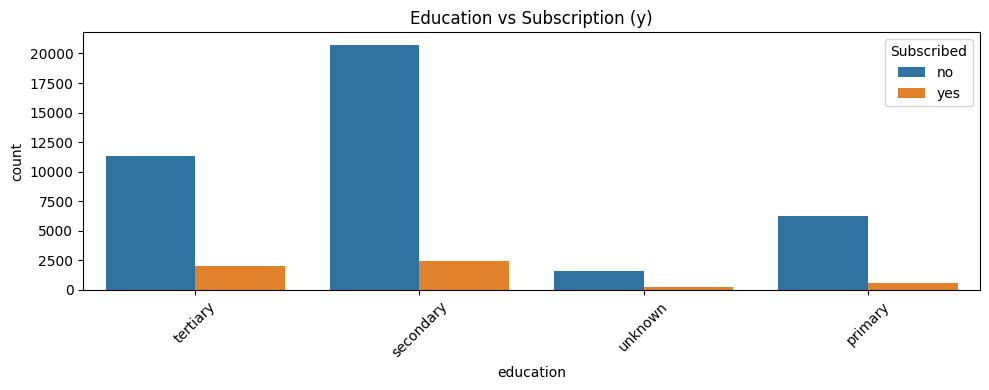

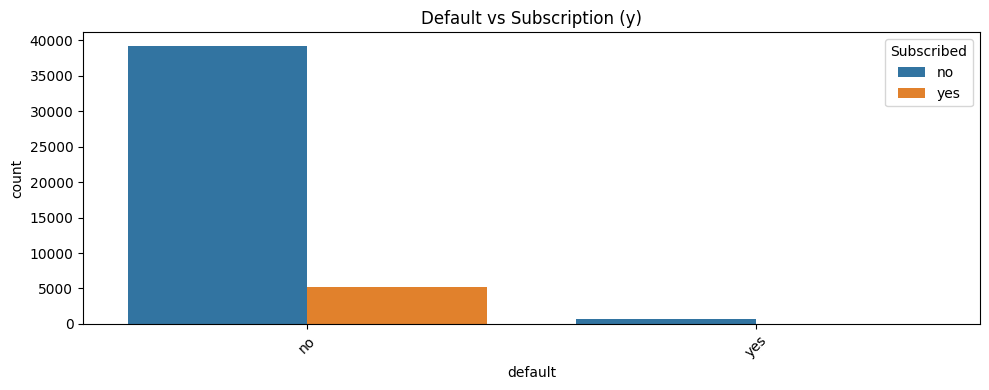

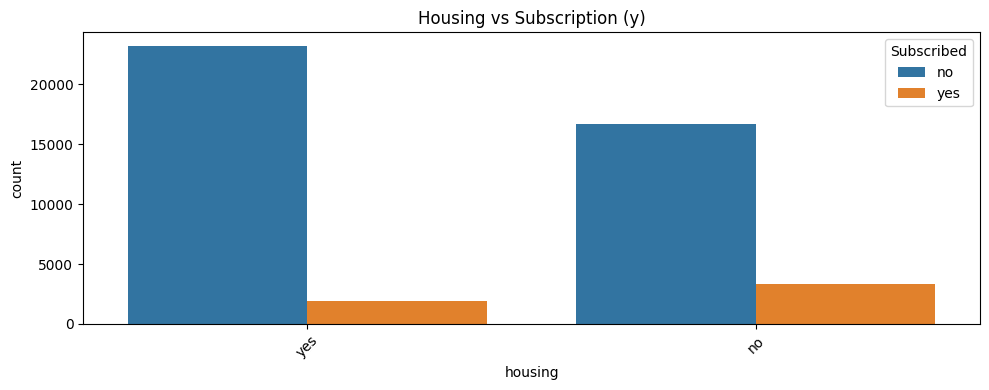

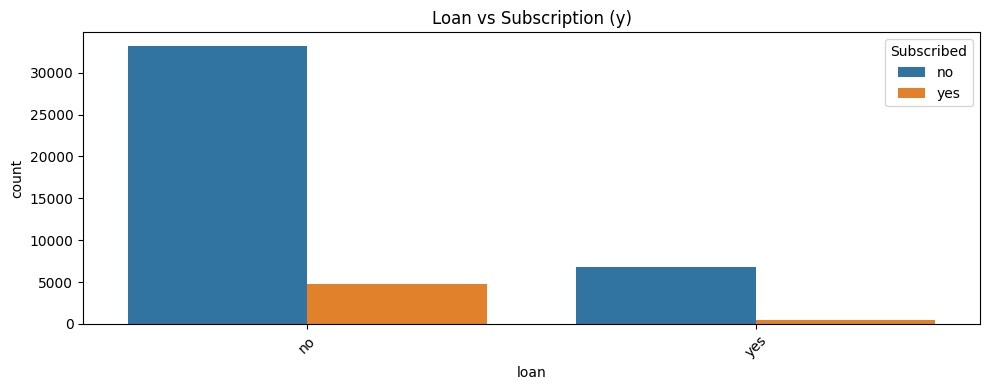

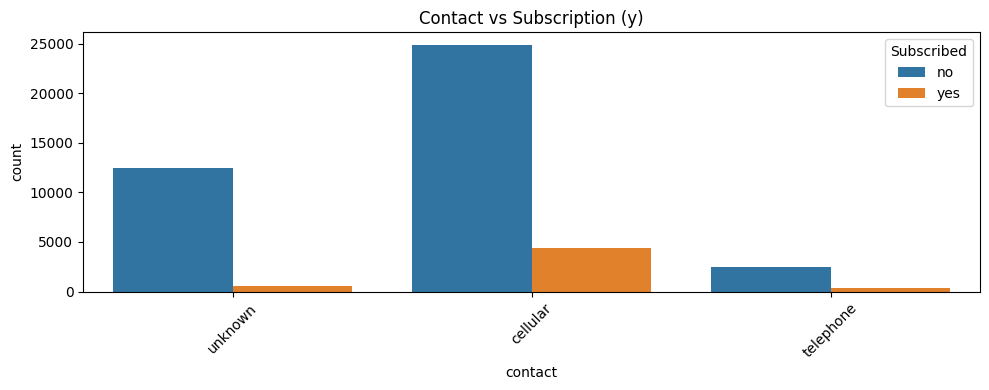

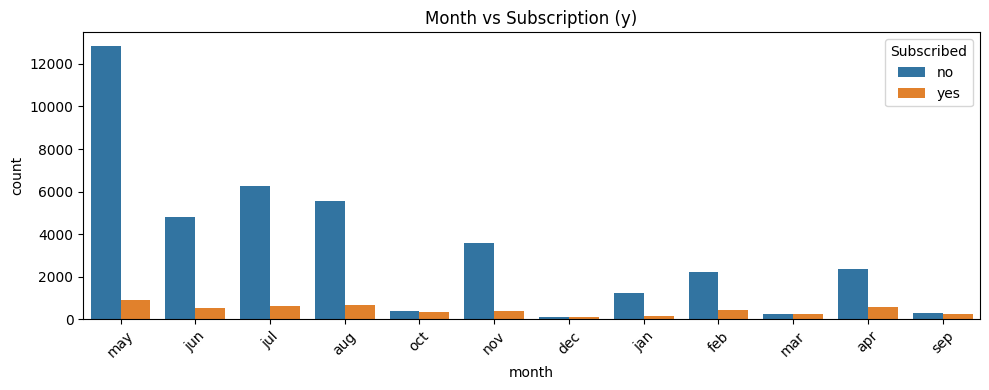

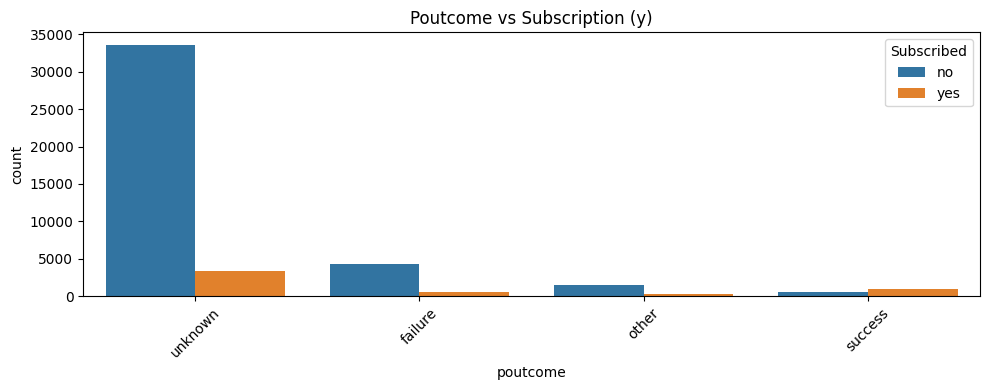

In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col.capitalize()} vs Subscription (y)')
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed')
    plt.tight_layout()
    plt.show()


##**Feature Engirenning**

In [ ]:
# Create a copy of the original dataframe
df2 = df.copy()

In [ ]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


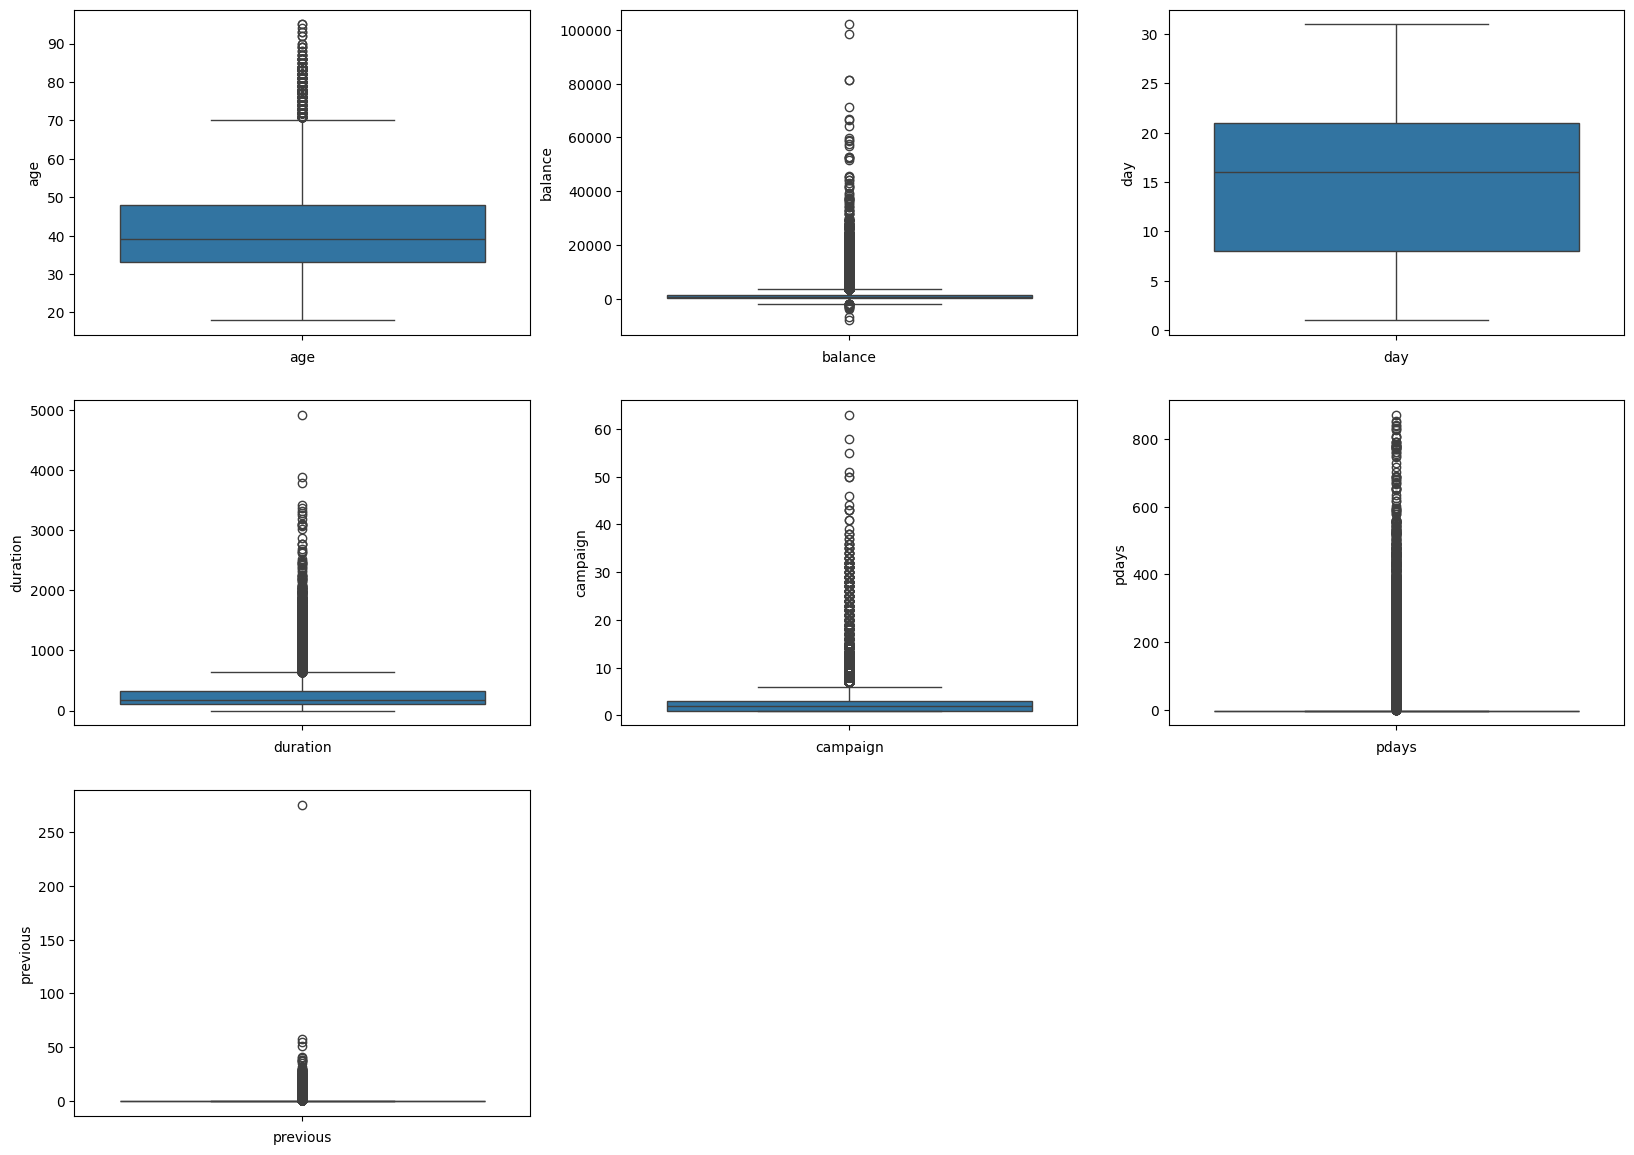

In [ ]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [ ]:
  # Identify columns with 'unknown' values
  unknown_cols = ['job', 'education', 'contact', 'poutcome']

  # Replace 'unknown' with mode (most frequent value) for each column
  for col in unknown_cols:
      mode_val = df2[col].mode()[0]
      df2[col] = df2[col].replace('unknown', mode_val)

  # Verify replacement
  for col in unknown_cols:
      print(f"{col} unique values after replacement:", df2[col].unique())

job unique values after replacement: ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
education unique values after replacement: ['tertiary' 'secondary' 'primary']
contact unique values after replacement: ['cellular' 'telephone']
poutcome unique values after replacement: ['unknown' 'failure' 'other' 'success']


In [ ]:
# Label encode binary categorical variables

binary_cols = ['default', 'housing', 'loan', 'y']
label_encoder = LabelEncoder()
for col in binary_cols:
    df2[col] = label_encoder.fit_transform(df2[col])

# One-hot encode other categorical variables
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df2 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)

print("Data shape after encoding:", df2.shape)

Data shape after encoding: (45211, 40)


#Feature creation

In [ ]:
# 1. Create age groups
df2['age_group'] = pd.cut(df2['age'],
                         bins=[0, 30, 40, 50, 60, 100],
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

# 2. Create balance categories
df2['balance_category'] = pd.cut(df2['balance'],
                                bins=[-float('inf'), 0, 1000, 5000, float('inf')],
                                labels=['negative', 'low', 'medium', 'high'])

# 3. Interaction between housing loan and personal loan
df2['loan_interaction'] = df2['housing'] * df2['loan']

# 4. Campaign success rate (previous success / total contacts)
df2['success_rate'] = df2['previous'] / (df2['campaign'] + 1)  # +1 to avoid division by zero

# 5. Duration per campaign contact
df2['duration_per_contact'] = df2['duration'] / (df2['campaign'] + 1)

# 6. Create a flag for previous success
df2['had_previous_success'] = (df2['previous'] > 0).astype(int)

# One-hot encode the new categorical features we created
new_categorical = ['age_group', 'balance_category']
df2 = pd.get_dummies(df2, columns=new_categorical, drop_first=True)

print("Data shape after feature creation:", df2.shape)

Data shape after feature creation: (45211, 51)


In [ ]:
df2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,success_rate,duration_per_contact,had_previous_success,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60+,balance_category_low,balance_category_medium,balance_category_high
0,58,0,2143,1,0,5,261,1,-1,0,...,0.000000,130.500000,0,False,False,True,False,False,True,False
1,44,0,29,1,0,5,151,1,-1,0,...,0.000000,75.500000,0,False,True,False,False,True,False,False
2,33,0,2,1,1,5,76,1,-1,0,...,0.000000,38.000000,0,True,False,False,False,True,False,False
3,47,0,1506,1,0,5,92,1,-1,0,...,0.000000,46.000000,0,False,True,False,False,False,True,False
4,33,0,1,0,0,5,198,1,-1,0,...,0.000000,99.000000,0,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0.000000,244.250000,0,False,False,True,False,True,False,False
45207,71,0,1729,0,0,17,456,2,-1,0,...,0.000000,152.000000,0,False,False,False,True,False,True,False
45208,72,0,5715,0,0,17,1127,5,184,3,...,0.500000,187.833333,1,False,False,False,True,False,False,True
45209,57,0,668,0,0,17,508,4,-1,0,...,0.000000,101.600000,0,False,False,True,False,True,False,False


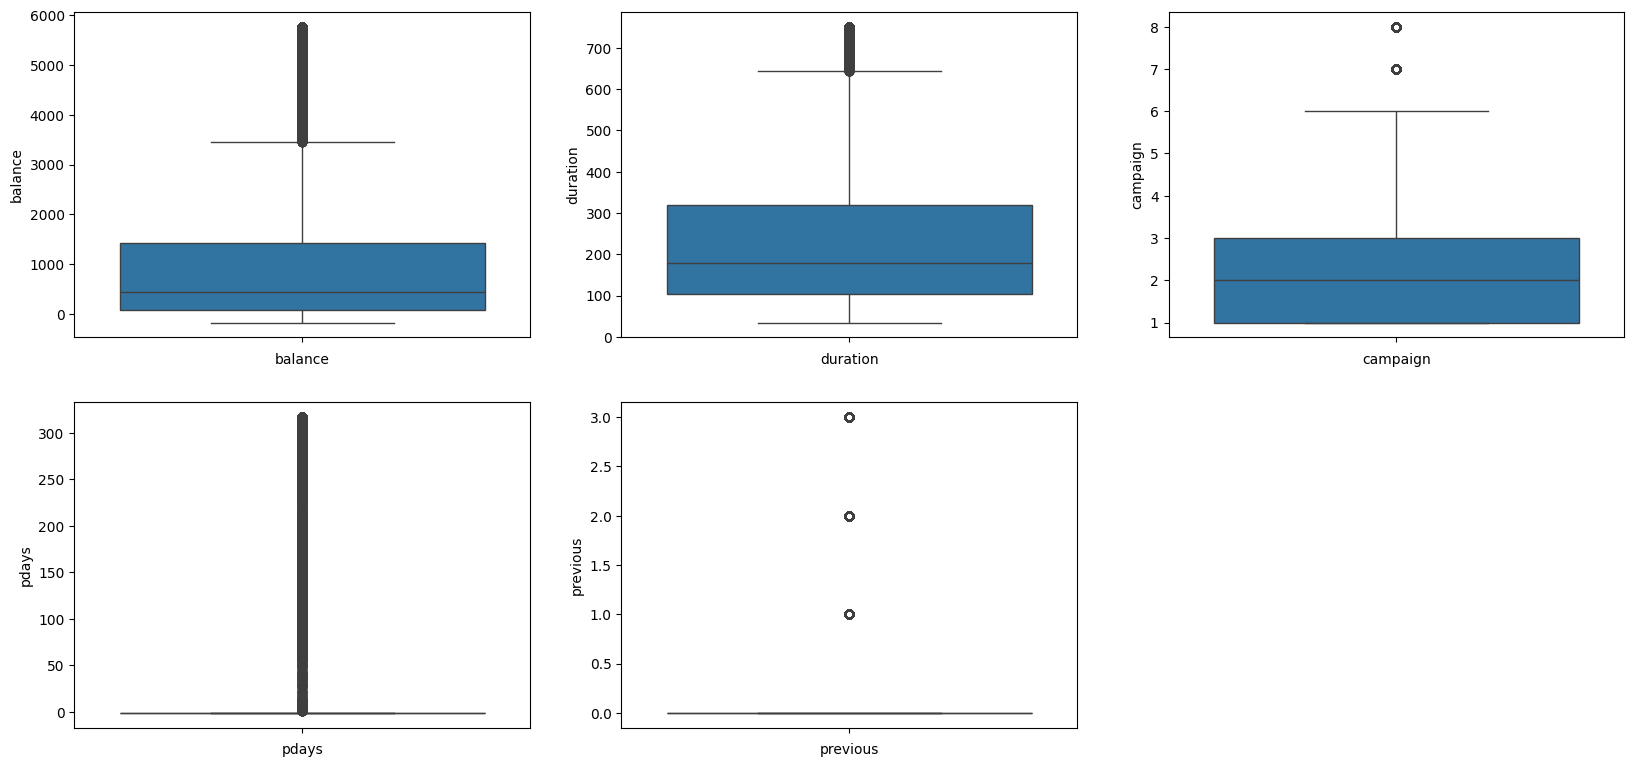

In [ ]:
# Define a function to cap outliers
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# Apply to numerical features with outliers
outlier_cols = ['balance', 'duration', 'campaign', 'pdays', 'previous']
for col in outlier_cols:
    df2[col] = cap_outliers(df2[col])

# Verify outlier treatment
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in outlier_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df2[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

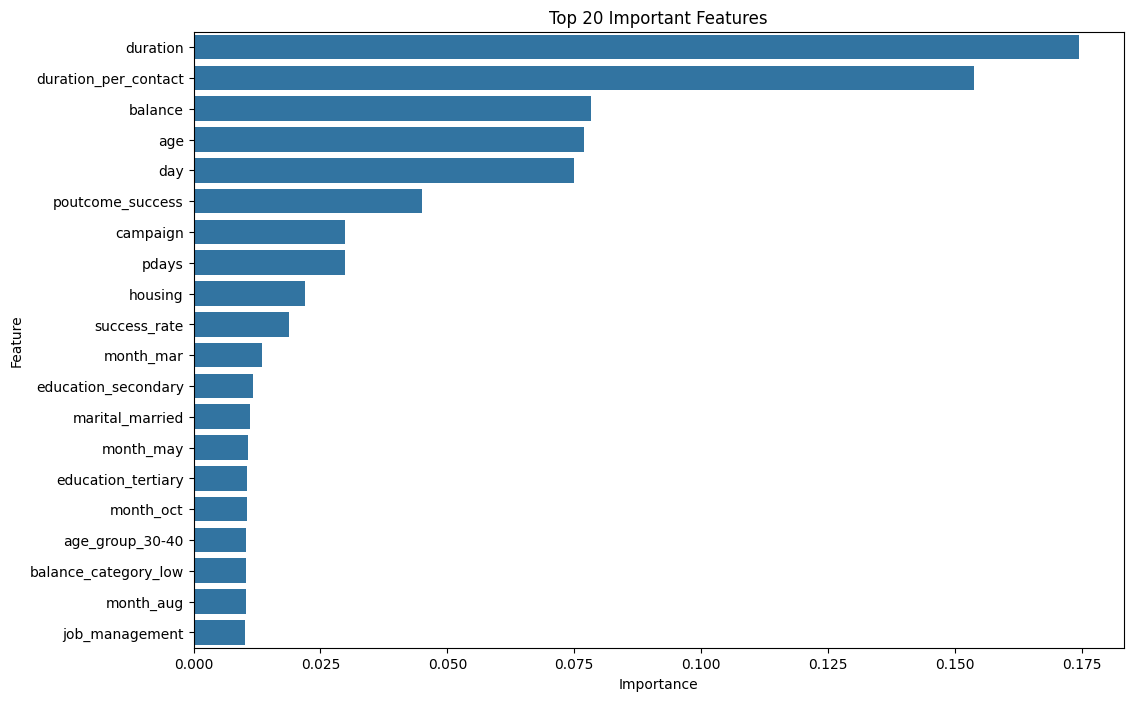

Selected features: ['duration', 'duration_per_contact', 'balance', 'age', 'day', 'poutcome_success', 'campaign', 'pdays', 'housing', 'success_rate', 'month_mar', 'education_secondary', 'marital_married', 'month_may', 'education_tertiary', 'month_oct', 'age_group_30-40', 'balance_category_low', 'month_aug', 'job_management', 'previous']
Final data shape: (45211, 22)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = df2.drop('y', axis=1)
y = df2['y']

# Train a Random Forest to get feature importance (as a proxy)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features')
plt.show()

# Select top features (adjust threshold as needed)
selected_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature'].tolist()
print("Selected features:", selected_features)

# Filter dataframe to keep only important features
df2 = df2[selected_features + ['y']]
print("Final data shape:", df2.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
# Split into features and target
X = df2.drop('y', axis=1)
y = df2['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance (since we saw it's imbalanced)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_res))

Class distribution before SMOTE: Counter({0: 31937, 1: 4231})
Class distribution after SMOTE: Counter({0: 31937, 1: 31937})


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

# Initialize and train the decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

# Make predictions on training and testing sets
y_train_pred = dt.predict(X_train_res)  # Predictions on resampled training set
y_test_pred = dt.predict(X_test)       # Predictions on test set

# Calculate accuracies
train_accuracy = accuracy_score(y_train_res, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)

# You might also want to see other metrics for both sets
print("\nTraining Set Classification Report:")
print(classification_report(y_train_res, y_train_pred))

print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Feature importance from the decision tree
dt_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)



Training Set Accuracy: 1.0
Testing Set Accuracy: 0.8510450071878801

Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31937
           1       1.00      1.00      1.00     31937

    accuracy                           1.00     63874
   macro avg       1.00      1.00      1.00     63874
weighted avg       1.00      1.00      1.00     63874


Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7985
           1       0.39      0.51      0.45      1058

    accuracy                           0.85      9043
   macro avg       0.66      0.70      0.68      9043
weighted avg       0.87      0.85      0.86      9043



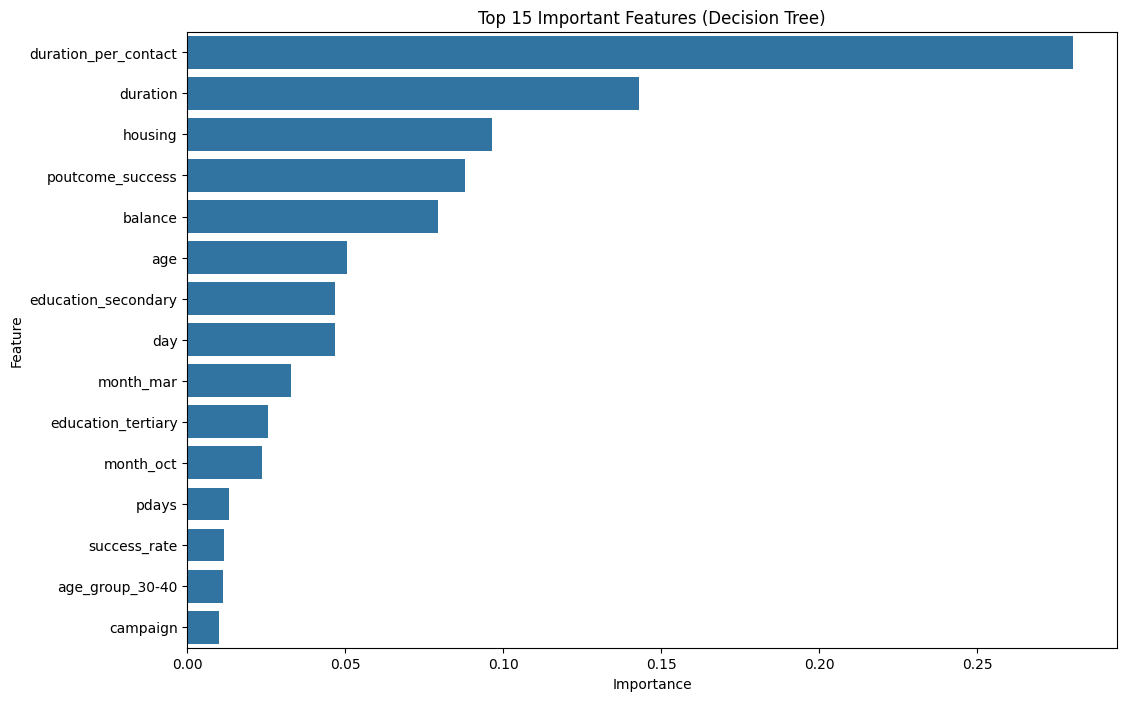

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance.head(15))
plt.title('Top 15 Important Features (Decision Tree)')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Simplified parameter distribution
param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Randomized search with fewer iterations
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Fewer iterations than grid search
    cv=3,       # Fewer cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_res, y_train_res)

# Best parameters and model
best_dt = random_search.best_estimator_


🔧 Best Model Performance on TRAINING Set (Resampled):
--------------------------------------------------
Training Accuracy: 0.9362
Training F1 Score: 0.936
Training ROC AUC: 0.9362

Training Classification Report:
              precision    recall  f1-score   support

           0     0.9328    0.9402    0.9365     31937
           1     0.9397    0.9323    0.9360     31937

    accuracy                         0.9362     63874
   macro avg     0.9362    0.9362    0.9362     63874
weighted avg     0.9362    0.9362    0.9362     63874



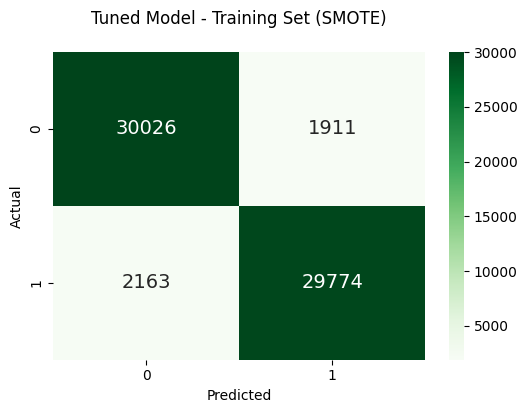


🧪 Best Model Performance on TEST Set:
--------------------------------------------
Test Accuracy: 0.8603
Test F1 Score: 0.48
Test ROC AUC: 0.7262

Test Classification Report:
              precision    recall  f1-score   support

           0     0.9381    0.9013    0.9193      7985
           1     0.4252    0.5510    0.4800      1058

    accuracy                         0.8603      9043
   macro avg     0.6817    0.7262    0.6997      9043
weighted avg     0.8781    0.8603    0.8679      9043



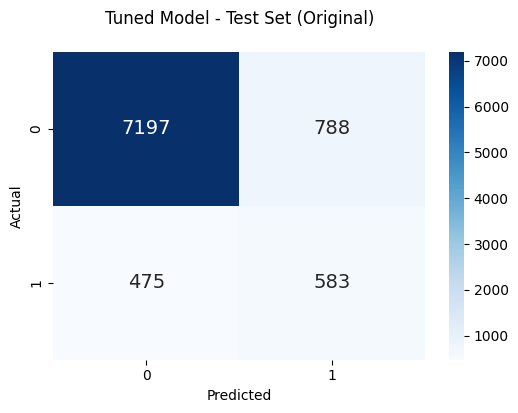


📈 Performance Comparison:
+------------------+------------+------------+-----------+
| Dataset          |   Accuracy |   F1 Score |   ROC AUC |
+==================+============+============+===========+
| Training (SMOTE) |     0.9362 |      0.936 |    0.9362 |
+------------------+------------+------------+-----------+
| Test (Original)  |     0.8603 |      0.48  |    0.7262 |
+------------------+------------+------------+-----------+


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Get the best tuned model from RandomizedSearchCV
best_dt = random_search.best_estimator_


# 1. Evaluate on TRAINING Set (Resampled with SMOTE)

y_train_pred = best_dt.predict(X_train_res)

print("\n\033[1m🔧 Best Model Performance on TRAINING Set (Resampled):\033[0m")
print("--------------------------------------------------")
print("Training Accuracy:", round(accuracy_score(y_train_res, y_train_pred), 4))
print("Training F1 Score:", round(f1_score(y_train_res, y_train_pred), 4))
print("Training ROC AUC:", round(roc_auc_score(y_train_res, y_train_pred), 4))

print("\n\033[1mTraining Classification Report:\033[0m")
print(classification_report(y_train_res, y_train_pred, digits=4))

# Confusion Matrix (Training)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train_res, y_train_pred),
            annot=True, fmt='d', cmap='Greens',
            annot_kws={"size": 14})
plt.title('Tuned Model - Training Set (SMOTE)', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Evaluate on TEST Set (Original Unseen Data)

y_test_pred = best_dt.predict(X_test)

print("\n\033[1m🧪 Best Model Performance on TEST Set:\033[0m")
print("--------------------------------------------")
print("Test Accuracy:", round(accuracy_score(y_test, y_test_pred), 4))
print("Test F1 Score:", round(f1_score(y_test, y_test_pred), 4))
print("Test ROC AUC:", round(roc_auc_score(y_test, y_test_pred), 4))

print("\n\033[1mTest Classification Report:\033[0m")
print(classification_report(y_test, y_test_pred, digits=4))

# Confusion Matrix (Test)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt='d', cmap='Blues',
            annot_kws={"size": 14})
plt.title('Tuned Model - Test Set (Original)', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Compare Key Metrics Side-by-Side

metrics_df = pd.DataFrame({
    'Dataset': ['Training (SMOTE)', 'Test (Original)'],
    'Accuracy': [
        round(accuracy_score(y_train_res, y_train_pred), 4),
        round(accuracy_score(y_test, y_test_pred), 4)
    ],
    'F1 Score': [
        round(f1_score(y_train_res, y_train_pred), 4),
        round(f1_score(y_test, y_test_pred), 4)
    ],
    'ROC AUC': [
        round(roc_auc_score(y_train_res, y_train_pred), 4),
        round(roc_auc_score(y_test, y_test_pred), 4)
    ]
})

print("\n\033[1m📈 Performance Comparison:\033[0m")
print(metrics_df.to_markdown(index=False, tablefmt="grid"))


In [ ]:
print("Best Parameters from RandomizedSearchCV:")
print(random_search.best_params_)


Best Parameters from RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 14}


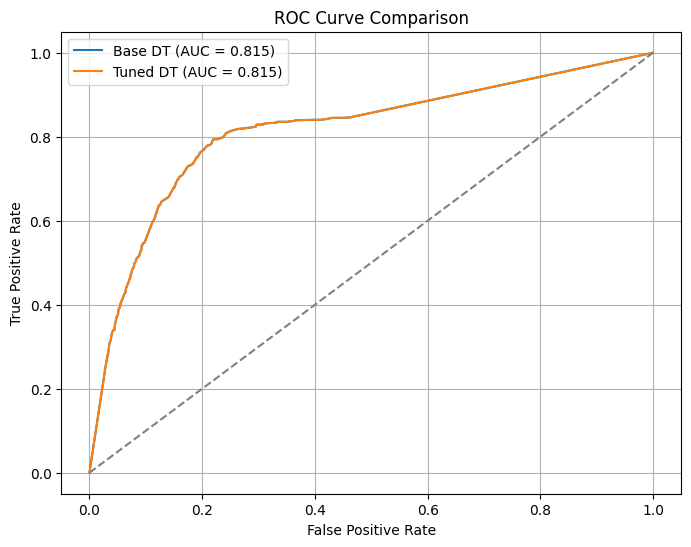

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
y_proba_base = best_dt.predict_proba(X_test)[:, 1]
y_proba_random = random_search.best_estimator_.predict_proba(X_test)[:, 1]

# ROC values
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_base)
fpr_random, tpr_random, _ = roc_curve(y_test, y_proba_random)

plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label='Base DT (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba_base)))
plt.plot(fpr_random, tpr_random, label='Tuned DT (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba_random)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


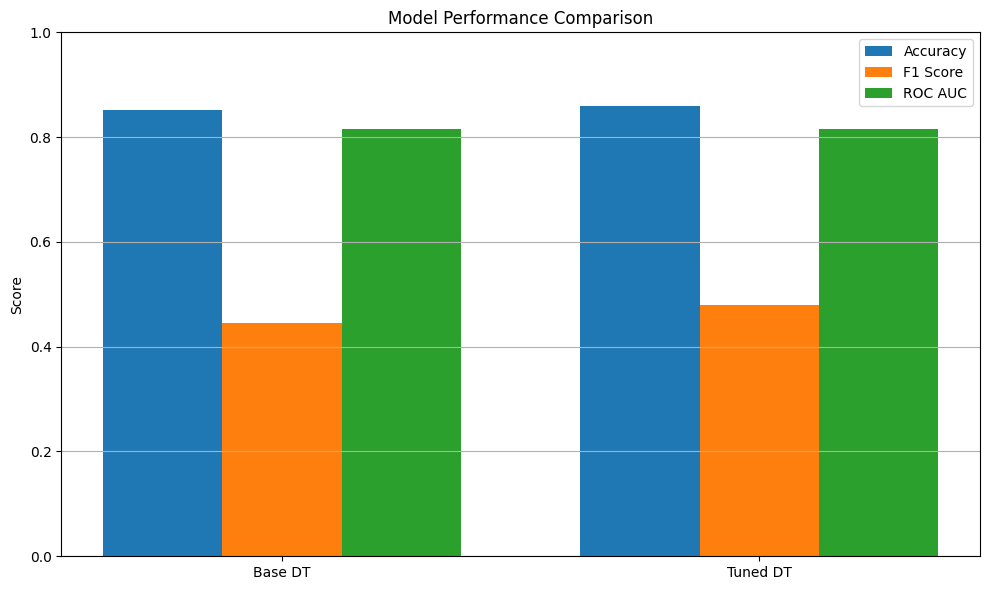

In [ ]:
import numpy as np

# Values
accuracy_vals = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_random)]
f1_vals = [f1_score(y_test, y_pred), f1_score(y_test, y_pred_random)]
roc_vals = [roc_auc_score(y_test, y_proba_base), roc_auc_score(y_test, y_proba_random)]

# Plot
x_labels = ['Base DT', 'Tuned DT']
x = np.arange(len(x_labels))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracy_vals, width, label='Accuracy')
plt.bar(x, f1_vals, width, label='F1 Score')
plt.bar(x + width, roc_vals, width, label='ROC AUC')

plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(x, x_labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
